# Tarea 4 - Introducción a la Biomecánica
### Pregunta 1

In [26]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os.path import join
from scipy import integrate
from decimal import Decimal
import scipy.optimize as sp

In [3]:
# Paths
harmonic_path = join('data', 'harmonic.csv')
quasistatic_path = join('data', 'quasistatic.csv')

# Data windows
cycle_h = {
    '0': 3935,  # Start of the experiment
    'f': 4136,  # End of the experiment
    '1': 3956   # End of the first oscillation
}
cycle_q = {
    '0': 3620,  # Start of the experiment
    'f': 6700,  # End of the experiment
}

# Constants
g = 9.81
A = 7 * 10 ** (-6)

# Graphs
naranjo = '#F59A23'
fig_size = (8, 5)

In [4]:
# Import data
harmonic = pd.read_csv(harmonic_path, skiprows=[0, 1, 2, 4])
quasistatic = pd.read_csv(quasistatic_path, skiprows=[0, 1, 2, 4])
quasistatic.head()

,Elapsed Time,Disp,Load 3
0,0.00,1.064,-7.61
1,0.01,1.065,-7.53
2,0.02,1.069,-7.50
3,0.03,1.074,-7.26
4,0.04,1.079,-6.67


In [5]:
# Remove spaces from column names
quasistatic.rename(columns=lambda x: x.strip(), inplace=True)
harmonic.rename(columns=lambda x: x.strip(), inplace=True)

In [6]:
# Check data
quasistatic.loc[:, 'Elapsed Time']

0        0.00
1        0.01
2        0.02
3        0.03
4        0.04
        ...  
8536    85.36
8537    85.37
8538    85.38
8539    85.39
8540    85.40
Name: Elapsed Time, Length: 8541, dtype: float64

In [7]:
# Data columns
time_q = quasistatic.loc[:, 'Elapsed Time']
disp_q = quasistatic.loc[:, 'Disp']
load_q = quasistatic.loc[:, 'Load 3']

str_q = (load_q * g / 1000) / A         # Stress
def_q = disp_q / disp_q[cycle_q['0']]   # Deformation

time_h = harmonic.loc[:, 'Elapsed Time']
disp_h = harmonic.loc[:, 'Disp']
load_h = harmonic.loc[:, 'Load 3']

str_h = (load_h * g / 1000) / A         # Stress
def_h = disp_h / disp_h[cycle_h['0']]   # Deformation

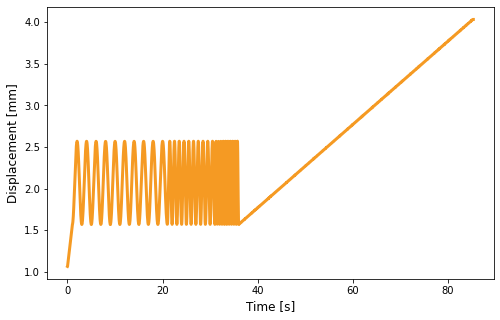

In [8]:
# Plot quasistatic data
fig = plt.figure(figsize=fig_size)
plt.plot(
    time_q,
    disp_q,
    color=naranjo,
    linewidth=3
)
plt.xlabel('Time [s]', fontsize=12)
plt.ylabel('Displacement [mm]', fontsize=12)
# plt.title('Quasistatic (Displacement vs. Time)', fontsize=14)
plt.show()

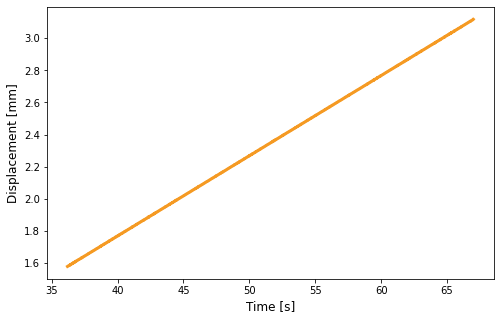

In [9]:
# Plot quasistatic data
fig = plt.figure(figsize=fig_size)
plt.plot(
    time_q[cycle_q['0']:cycle_q['f']],
    disp_q[cycle_q['0']:cycle_q['f']],
    color=naranjo,
    linewidth=3
)
plt.xlabel('Time [s]', fontsize=12)
plt.ylabel('Displacement [mm]', fontsize=12)
# plt.title('Quasistatic (Displacement vs. Time)', fontsize=14)
plt.show()

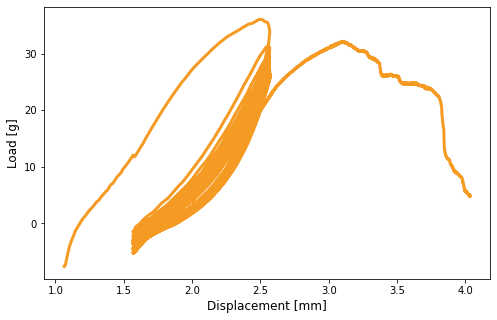

In [10]:
# Plot quasistatic data
fig = plt.figure(figsize=fig_size)
plt.plot(
    disp_q,
    load_q,
    color=naranjo,
    linewidth=3
)
plt.xlabel('Displacement [mm]', fontsize=12)
plt.ylabel('Load [g]', fontsize=12)
# plt.title('Quasistatic (Load vs. Displacement)', fontsize=14)
plt.show()

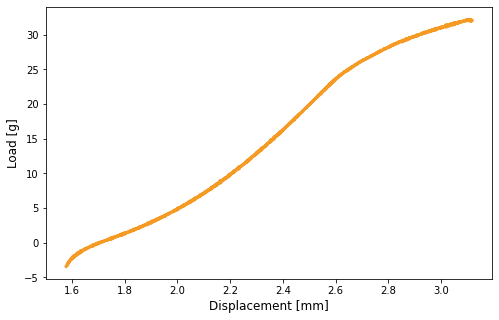

In [11]:
# Plot quasistatic data
fig = plt.figure(figsize=fig_size)
plt.plot(
    disp_q[cycle_q['0']:cycle_q['f']],
    load_q[cycle_q['0']:cycle_q['f']],
    color=naranjo,
    linewidth=3
)
plt.xlabel('Displacement [mm]', fontsize=12)
plt.ylabel('Load [g]', fontsize=12)
# plt.title('Quasistatic (Load vs. Displacement)', fontsize=14)
plt.show()

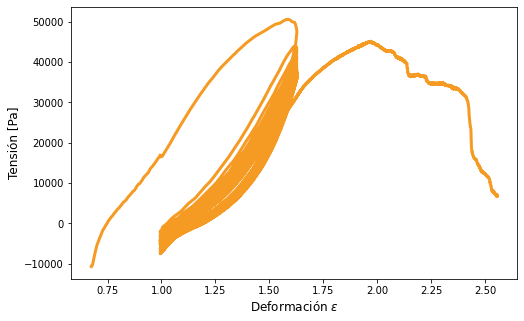

In [12]:
# Plot quasistatic data
fig = plt.figure(figsize=fig_size)
plt.plot(
    def_q,
    str_q,
    color=naranjo,
    linewidth=3
)
plt.xlabel(r'Deformación $\epsilon$', fontsize=12)
plt.ylabel('Tensión [Pa]', fontsize=12)
# plt.title('Quasistatic (Load vs. Displacement)', fontsize=14)
plt.show()

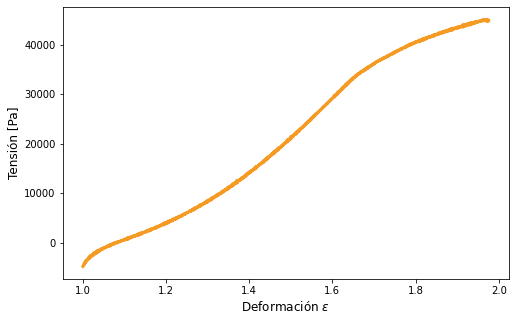

In [13]:
# Plot quasistatic data
fig = plt.figure(figsize=fig_size)
plt.plot(
    def_q[cycle_q['0']:cycle_q['f']],
    str_q[cycle_q['0']:cycle_q['f']],
    color=naranjo,
    linewidth=3
)
plt.xlabel(r'Deformación $\epsilon$', fontsize=12)
plt.ylabel('Tensión [Pa]', fontsize=12)
# plt.title('Quasistatic (Load vs. Displacement)', fontsize=14)
plt.show()

### Caso Armónico

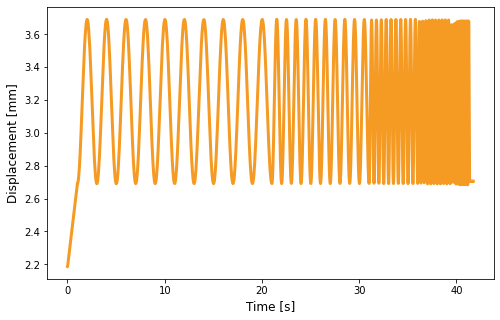

In [14]:
# Plot harmonic data
fig = plt.figure(figsize=fig_size)
plt.plot(
    time_h,
    disp_h,
    color=naranjo,
    linewidth=3
)
plt.xlabel('Time [s]', fontsize=12)
plt.ylabel('Displacement [mm]', fontsize=12)
# plt.title('Harmonic (Displacement vs. Time)', fontsize=14)
plt.show()

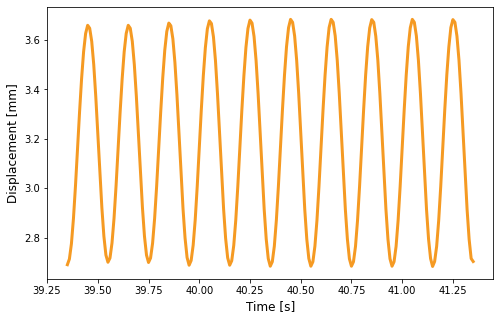

In [15]:
# Plot harmonic data
fig = plt.figure(figsize=fig_size)
plt.plot(
    time_h[cycle_h['0']:cycle_h['f']],
    disp_h[cycle_h['0']:cycle_h['f']],
    color=naranjo,
    linewidth=3
)
plt.xlabel('Time [s]', fontsize=12)
plt.ylabel('Displacement [mm]', fontsize=12)
# plt.title('Harmonic (Displacement vs. Time)', fontsize=14)
plt.show()

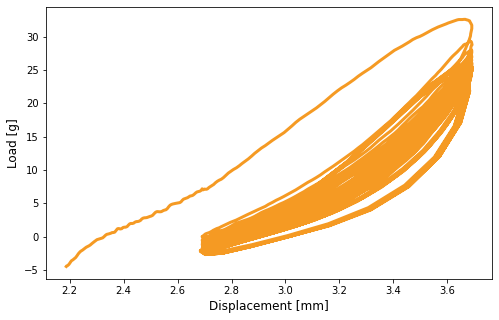

In [16]:
# Plot harmonic data
fig = plt.figure(figsize=fig_size)
plt.plot(
    disp_h,
    load_h,
    color=naranjo,
    linewidth=3
)
plt.xlabel('Displacement [mm]', fontsize=12)
plt.ylabel('Load [g]', fontsize=12)
# plt.title('Harmonic (Load vs. Displacement)', fontsize=14)
plt.show()

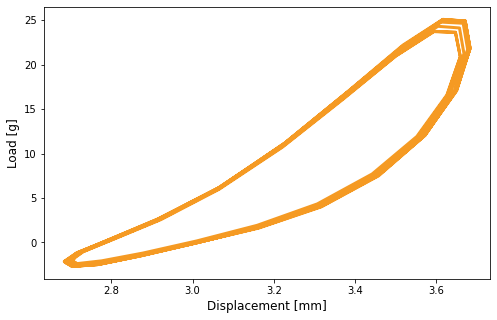

In [17]:
# Plot harmonic data
fig = plt.figure(figsize=fig_size)
plt.plot(
    disp_h[cycle_h['0']:cycle_h['f']],
    load_h[cycle_h['0']:cycle_h['f']],
    color=naranjo,
    linewidth=3
)
plt.xlabel('Displacement [mm]', fontsize=12)
plt.ylabel('Load [g]', fontsize=12)
# plt.title('Harmonic (Load vs. Displacement)', fontsize=14)
plt.show()

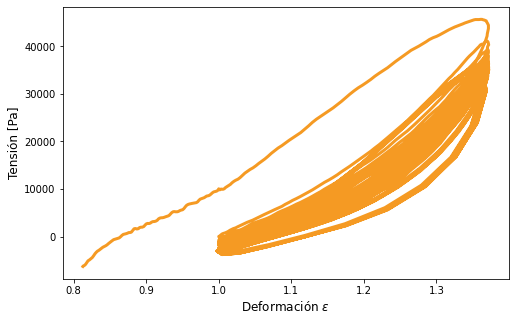

In [18]:
# Plot harmonic data
fig = plt.figure(figsize=fig_size)
plt.plot(
    def_h,
    str_h,
    color=naranjo,
    linewidth=3
)
plt.xlabel(r'Deformación $\epsilon$', fontsize=12)
plt.ylabel('Tensión [Pa]', fontsize=12)
plt.show()

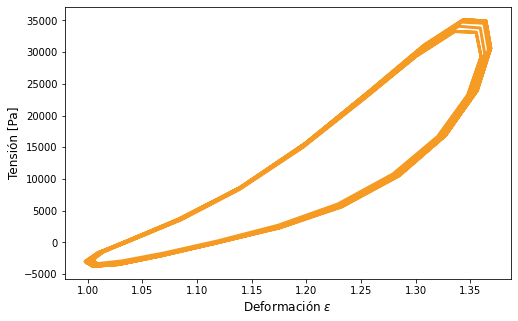

In [19]:
# Plot harmonic data
fig = plt.figure(figsize=fig_size)
plt.plot(
    def_h[cycle_h['0']:cycle_h['f']],
    str_h[cycle_h['0']:cycle_h['f']],
    color=naranjo,
    linewidth=3
)
plt.xlabel(r'Deformación $\epsilon$', fontsize=12)
plt.ylabel('Tensión [Pa]', fontsize=12)
plt.show()

### Pregunta 2

In [24]:
stretch_q =  (disp_q - disp_q[cycle_q['0']]) / 1000 # Stretch

lam_array = stretch_q[cycle_q['0']:cycle_q['f']]

In [49]:
global p, c1
p = 0.5
c1 = 286.61

In [51]:
# Función sigma_11 
def s11(lam, lam_t):
    return (-p + 2 * c1 * lam ** 2)

In [52]:
# Función sigma_22
def s22(lam, lam_t):
    return (-p + 2 * c1 * lam_t ** 2)

In [53]:
g_array = []
for lam in lam_array:
    def g(lam_t):
        return s22(lam, lam_t)
    g_array.append(g)

In [54]:
lam_t_array = []
for i, lam in enumerate(lam_array):
    lam_t = sp.newton(g_array[i], 0.5, maxiter = 50)
    lam_t_array.append(lam_t)

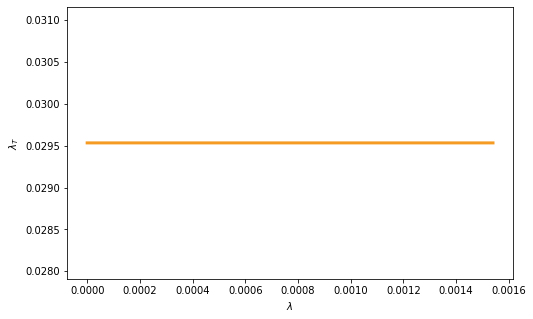

In [55]:
# Plot método de Newton
plt.figure(figsize=fig_size)
plt.ylabel(r'$\lambda_T$')
plt.xlabel(r'$\lambda$')
plt.plot(lam_array, lam_t_array, color = naranjo, linewidth = 3)
plt.show()

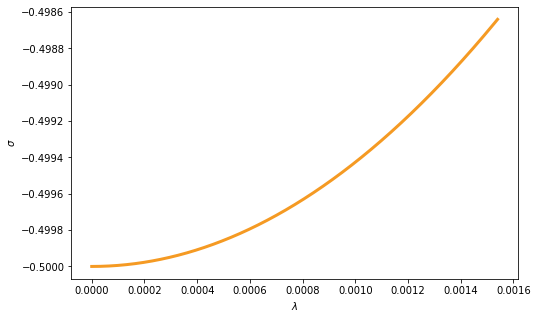

In [57]:
array = []

for i in range(len(lam_array)):
    c = s11(lam_array[i + 3620], lam_t_array[i])
    array.append(c)

plt.figure(figsize=fig_size)
plt.ylabel(r'$\sigma$')
plt.xlabel(r'$\lambda$')
plt.plot(lam_array, array, color = naranjo, linewidth = 3)
plt.show()

### Pregunta 3

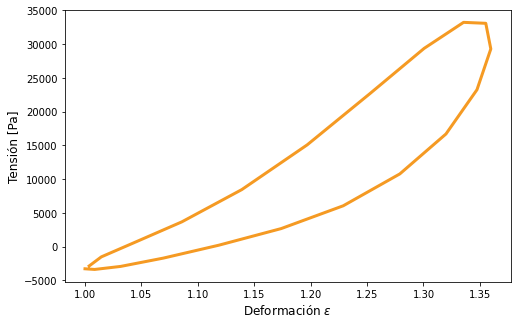

In [46]:
# Plot harmonic data
fig = plt.figure(figsize=fig_size)
plt.plot(
    def_h[cycle_h['0']:cycle_h['1']],
    str_h[cycle_h['0']:cycle_h['1']],
    color=naranjo,
    linewidth=3
)
plt.xlabel(r'Deformación $\epsilon$', fontsize=12)
plt.ylabel('Tensión [Pa]', fontsize=12)
plt.show()

In [47]:
# Integrate using Simpson's rule
# https://en.wikipedia.org/wiki/Simpson%27s_rule
# https://stackoverflow.com/questions/17602076/how-do-i-integrate-two-1-d-data-arrays-in-python

e_loss = integrate.simpson(
      str_h[cycle_h['0']:cycle_h['1']],
      def_h[cycle_h['0']:cycle_h['1']],
      axis=-1,
      even='avg'
   )
print(f'Energía disipada:', '%.4E' % Decimal(e_loss / 1000), 'J')

Energía disipada: -3.3889E+00 J


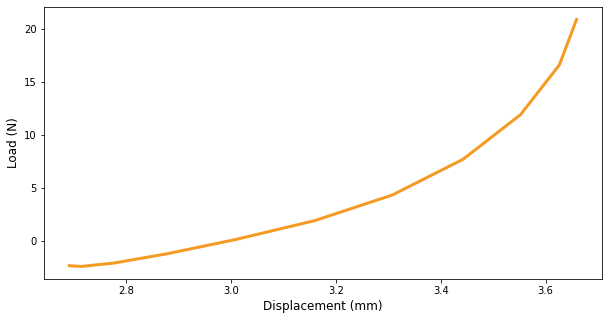

In [49]:
# Plot harmonic data
fig = plt.figure(figsize=(10, 5))
plt.plot(
    disp_h[cycle_h['start']:3946],
    load_h[cycle_h['start']:3946],
    color=naranjo,
    linewidth=3
)
plt.xlabel('Displacement (mm)', fontsize=12)
plt.ylabel('Load (N)', fontsize=12)
# plt.title('Harmonic (Load vs. Displacement)', fontsize=14)
plt.show()

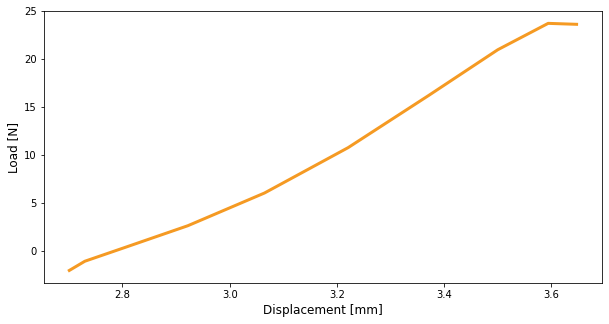

In [50]:
# Plot harmonic data
fig = plt.figure(figsize=(10, 5))
plt.plot(
    disp_h[3946:cycle_h['1']],
    load_h[3946:cycle_h['1']],
    color=naranjo,
    linewidth=3
)
plt.xlabel('Displacement [mm]', fontsize=12)
plt.ylabel('Load [N]', fontsize=12)
# plt.title('Harmonic (Load vs. Displacement)', fontsize=14)
plt.show()

In [55]:
e_loss = integrate.simpson(
      load_h[3946:cycle_h['1']],
      disp_h[3946:cycle_h['1']],
      axis=-1,
      even='avg'
   )
print(f'Energía disipada:', '%.4E' % Decimal(e_loss), 'J')

Energía disipada: -9.8101E+00 J


In [53]:
e_loss = integrate.simps(
      load_h[cycle_h['0']:3946],
      disp_h[cycle_h['0']:3946],
      axis=-1,
      even='avg'
   )
print(f'Energía disipada:', '%.4E' % Decimal(e_loss ), 'J')

Energía disipada: 3.6482E+00 J


In [54]:
e_loss = np.trapz(
      load_h[3946:cycle_h['1']],
      disp_h[3946:cycle_h['1']]
   )
print(f'Energía disipada:', '%.4E' % Decimal(e_loss), 'J')

Energía disipada: -9.8106E+00 J


#### Hecho con :heart: por Iván Vergara Lam